In [302]:
import pandas as pd 
import numpy as np 
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('modeling_ready.csv')
df.set_index('date',inplace=True)
df.head()

,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,unemployment_extension,ctatl_differicnced1
date,,,,,,,,,
2006-01-01,121900,113900,8000,6.5,1483,0,0,0,NaN
2006-02-01,122100,113800,8300,6.8,851,0,0,0,-632.0
2006-03-01,121900,114100,7800,6.4,335,0,0,0,-516.0
2006-04-01,122300,114600,7700,6.3,1053,0,0,0,718.0
2006-05-01,122900,115200,7600,6.2,2070,0,0,0,1017.0


In [3]:
df.drop('UR',axis=1,inplace=True)

In [4]:
df.head()

,Labor Force,Employed,Unemployed,ctotal,lockdown,e_stimulus,unemployment_extension,ctatl_differicnced1
date,,,,,,,,
2006-01-01,121900,113900,8000,1483,0,0,0,NaN
2006-02-01,122100,113800,8300,851,0,0,0,-632.0
2006-03-01,121900,114100,7800,335,0,0,0,-516.0
2006-04-01,122300,114600,7700,1053,0,0,0,718.0
2006-05-01,122900,115200,7600,2070,0,0,0,1017.0


the differnce in ctotal_differnced1 is set to be on 1.Meanwhile , I Need to find the AR MA based on AIC and BIC .    

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred f

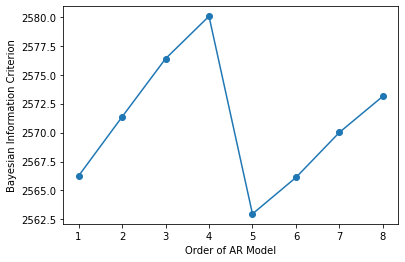

In [5]:
BIC = np.zeros(9)
for p in range(9):
    mod = ARMA(df.ctatl_differicnced1.dropna(), order=(p,0))
    res = mod.fit()
    
    BIC[p] = res.bic
    
plt.plot(range(1,9), BIC[1:9], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

# AIC

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred f

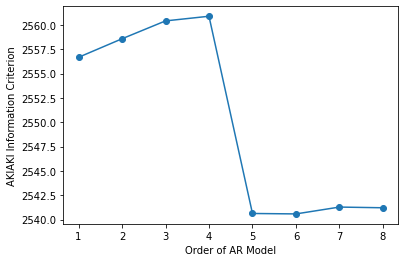

In [6]:
AIC = np.zeros(9)
for p in range(9):
    mod = ARMA(df.ctatl_differicnced1.dropna(), order=(p,0))
    res = mod.fit()
 
    AIC[p] = res.aic
    

plt.plot(range(1,9), AIC[1:9], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('AKIAKI Information Criterion')
plt.show()

In [8]:
df_min_max_scaled = df.copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column]=(df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
df_min_max_scaled.head()   

,Labor Force,Employed,Unemployed,ctotal,lockdown,e_stimulus,unemployment_extension,ctatl_differicnced1
date,,,,,,,,
2006-01-01,0.842697,0.915254,0.144928,0.413601,0.0,0.0,0.0,NaN
2006-02-01,0.853933,0.912429,0.159420,0.218238,0.0,0.0,0.0,0.323432
2006-03-01,0.842697,0.920904,0.135266,0.058733,0.0,0.0,0.0,0.355336
2006-04-01,0.865169,0.935028,0.130435,0.280680,0.0,0.0,0.0,0.694719
2006-05-01,0.898876,0.951977,0.125604,0.595054,0.0,0.0,0.0,0.776953


In [9]:
df_min_max_scaled.lockdown=df_min_max_scaled.lockdown.astype(int)
df_min_max_scaled.e_stimulus=df_min_max_scaled.e_stimulus.astype(int)
df_min_max_scaled.unemployment_extension=df_min_max_scaled.unemployment_extension.astype(int)

In [10]:
df_min_max_scaled.drop(['Unemployed','ctotal'],axis=1,inplace=True)

In [11]:
dfmms=df_min_max_scaled.dropna()

In [20]:
y= df.ctatl_differicnced1.dropna()
x=dfmms.drop("ctatl_differicnced1",axis=1)

X_train=y['2006-01-01':'2017-01-01']
X_test=y['2017-01-01':'2020-01-01']
y_train=x['2006-01-01':'2017-01-01']
y_test=x['2017-01-01':'2019-12-01']

 AIC and BIC both see that the ma as 5. now we determine then AR part of the order 
 

In [21]:

order_aic_bic=[]


for p in range(7):
    for q in range(7):
        model = SARIMAX(X_train, order=(p,0,q))
        results = model.fit()
        
        order_aic_bic.append((p,q,results.aic, results.bic))
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

print(order_df.sort_values('AIC').head())

print(order_df.sort_values('BIC').head())


C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524:

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: Converg

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model

    p  q          AIC          BIC
19  2  5  1874.958986  1898.021401
39  5  4  1875.783644  1904.611663
26  3  5  1875.965290  1901.910507
33  4  5  1876.162164  1904.990183
40  5  5  1877.322247  1909.033068
    p  q          AIC          BIC
5   0  5  1878.599296  1895.896107
19  2  5  1874.958986  1898.021401
8   1  1  1889.966374  1898.614780
12  1  5  1878.939695  1899.119308
18  2  4  1880.483898  1900.663511


C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


it seems that the order for our model should be 2,1,5 

In [24]:
dfmms.head(2)

,Labor Force,Employed,lockdown,e_stimulus,unemployment_extension,ctatl_differicnced1
date,,,,,,
2006-02-01,0.853933,0.912429,0,0,0,0.323432
2006-03-01,0.842697,0.920904,0,0,0,0.355336


In [25]:
X=df.ctotal
y=dfmms.drop("ctatl_differicnced1",axis=1)

y_train=y['2006-08-01':'2017-01-01']
y_test=y['2017-01-01':'2020-01-01']
x_train=x['2006-08-01':'2017-01-01']
x_test=x['2017-01-01':'2019-12-01']

# Arima testing 

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred f

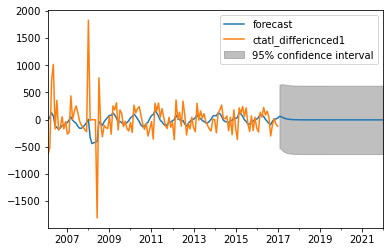

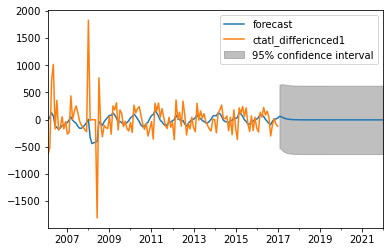

In [26]:
model=ARMA(X_train.dropna(),order=(2,1,5))
res=model.fit()
res.plot_predict(start=0,end='2022')

differenced data shows a spike in crime between 2021 and 2022 but the model fails to capture the Pandemic effect... yet in ordinary circumstances it only seems probable that the trend will continue to regress around the mean.this study is not nearly intrested in projecting a moving average therefore we need to build a predictive mechanism that resembles reality more.  

compare the real forcast to the unreal forcast using MSE as a method of evaluation 

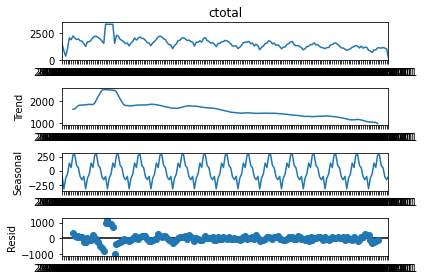

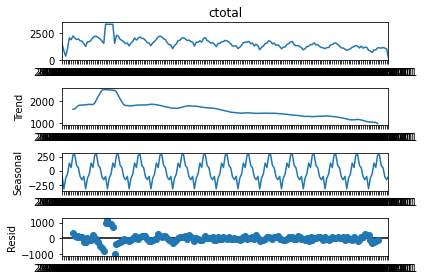

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_y=seasonal_decompose(X,period=12)
decomp_y.plot()


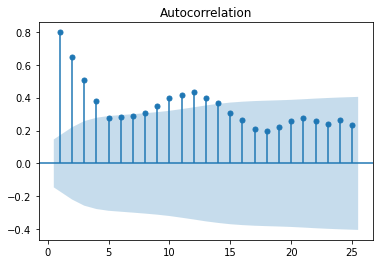

In [32]:
fig, ax1 = plt.subplots()
plot_acf(X, lags=25, zero=False,  ax=ax1)
plt.show()

In [33]:
diff=df.ctatl_differicnced1.diff().diff(5).dropna()

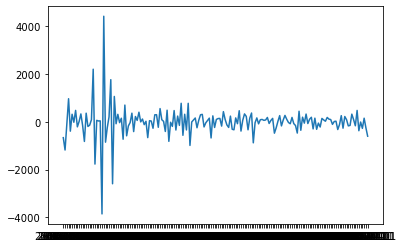

In [34]:
plt.plot(diff)

It looks as if we need to try 5,12,24 as S parameters 

In [35]:
diff

date
2006-08-01    -664.0
2006-09-01   -1181.0
2006-10-01    -107.0
2006-11-01     967.0
2006-12-01    -392.0
               ...  
2020-09-01      -9.0
2020-10-01    -274.0
2020-11-01     151.0
2020-12-01    -248.0
2021-01-01    -602.0
Name: ctatl_differicnced1, Length: 174, dtype: float64

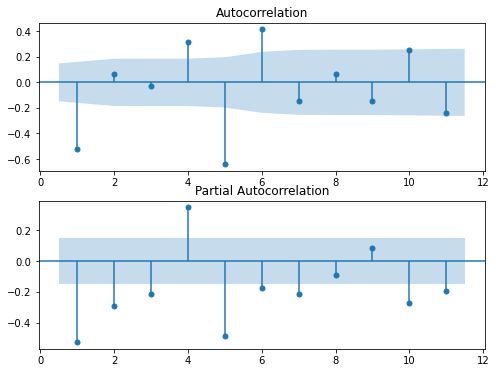

In [36]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))
plot_acf(diff,lags=11,zero=False, ax=ax1)

plot_pacf(diff,lags=11,zero=False, ax=ax2)

plt.show()

ar5 , MA 4 

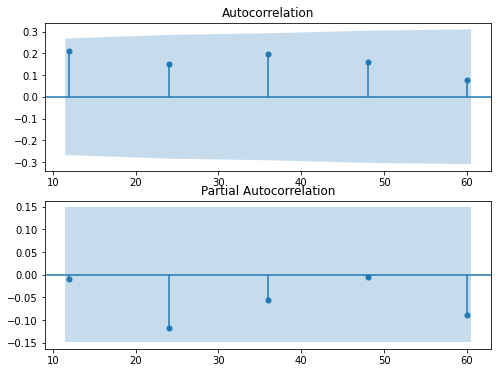

In [37]:
lags = [12, 24, 36, 48, 60]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

plot_acf(diff, lags=lags, ax=ax1)

plot_pacf(diff, lags=lags, ax=ax2)

plt.show()

In [42]:
mod=SARIMAX(diff,order=(3,0,5),seasonal_order=(3,0,5,12))
ress=mod.fit()
preds=ress.predict(start=0,end='2023')


C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:

In [39]:
ress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                  ctatl_differicnced1   No. Observations:                  174
Model:             SARIMAX(3, 0, 5)x(0, 1, [1], 12)   Log Likelihood               -1173.169
Date:                              Sun, 25 Jul 2021   AIC                           2366.338
Time:                                      11:38:09   BIC                           2397.214
Sample:                                  08-01-2006   HQIC                          2378.875
                                       - 01-01-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9715      0.072    -13.424      0.000      -1.113      -0.830
ar.L2         -0.7453      0.100     -7.437      0.000      -0.942      -0.549
ar.L3         -0.3875      0.093     -4.179      0.000      -0.569      -0.206
ma.L1          0.2212      0.588      0.376      0.707      -0.931       1.373
ma.L2          0.0495      0.536      0.092      0.926      -1.002       1.101
ma.L3         -0.0364      0.564     -0.065      0.949      -1.142       1.069
ma.L4         -0.2120      0.607     -0.350      0.727      -1.401       0.977
ma.L5         -0.9557      0.443     -2.159      0.031      -1.823      -0.088
ma.S.L12      -0.7888      0.149     -5.286      0.000      -1.081      -0.496
sigma2      1.336e+05   5.16e+04      2.587      0.010    3.24e+04    2.35e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):              1030.54
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

the q probability seems rather high , randomess seems rather High 

In [40]:
# the model is giving standard error of 0.067 with S 36 

Text(0.5, 1.0, 'Sarimax seasonal moving average')

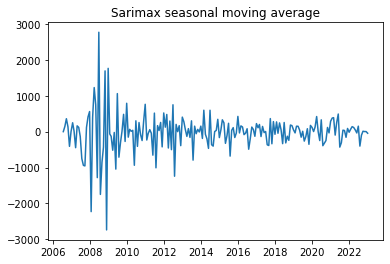

In [41]:
plt.plot(preds)
plt.title('Sarimax seasonal moving average')

In [300]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [329]:
df1=df.drop(['ctotal','ctatl_differicnced1'],axis=1)

In [330]:
df1

,Labor Force,Employed,Unemployed,lockdown,e_stimulus,unemployment_extension
date,,,,,,
2006-01-01,121900,113900,8000,0,0,0
2006-02-01,122100,113800,8300,0,0,0
2006-03-01,121900,114100,7800,0,0,0
2006-04-01,122300,114600,7700,0,0,0
2006-05-01,122900,115200,7600,0,0,0
...,...,...,...,...,...,...
2020-09-01,110100,97900,12300,1,0,1
2020-10-01,110200,98800,11400,1,0,1
2020-11-01,110000,98800,11100,1,1,1


# testing Sarimax with arima parameters and regressors 


In [369]:
X=df.ctotal
y=dfmms.drop("ctatl_differicnced1",axis=1)

y_train=y['2006-08-01':'2017-01-01']
y_test=y['2017-01-01':'2020-01-01']
X_train=X['2006-08-01':'2017-01-01']
X_test=X['2017-01-01':'2019-12-01']

In [396]:
def plot(sarimax_order):
    fig = plt.figure(figsize=(12, 6))
    ax1=fig.add_subplot(111)
    ax22=fig.add_subplot(111)

    ax1.plot(results[sarimax_order],color='blue',label='Pred')
    ax1.set_title('preds vs True')
    ax22.plot(results['ctotal'],color='red',label='True ')
    plt.legend()
    mape(results['ctotal'],results[sarimax_order])

In [370]:
results=pd.DataFrame(X_test)

In [371]:
mod1=SARIMAX(X_train,exog=y_train,order=(3,0,5),seasonal_order=(3,0,5,12),time_varying_regression=False)
res1=mod1.fit()
pred1=res1.predict(start='01-01-2017',end='01-02-2020',exog=y_test,dynamic=True)

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:

In [372]:
results=results.join(pred1)
results=results.rename(columns={'predicted_mean':'Sarimax30512'})

In [373]:
results.head()

,ctotal,Sarimax30512
date,,
2017-01-01,1138,1285.138107
2017-02-01,942,1259.193204
2017-03-01,1051,1260.930570
2017-04-01,1252,1439.112194
2017-05-01,1270,1532.452876


<ipython-input-396-11b70f4b2fbd>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


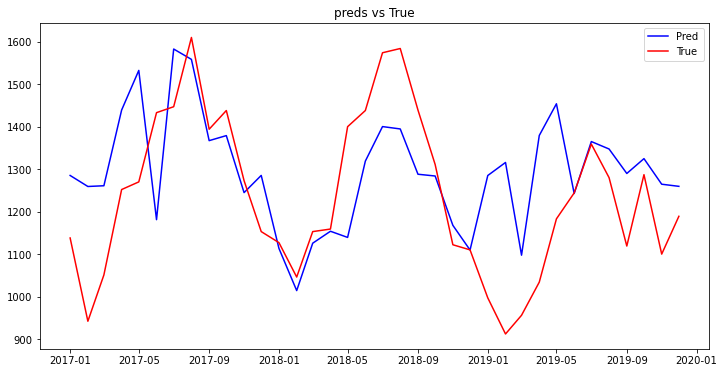

In [398]:
plot('Sarimax30512')

In [375]:
mape(results.ctotal,results.Sarimax30512)

11.523959609224883

In [376]:
mean_squared_error(results.ctotal,results.Sarimax30512)  

29968.75995118216

In [339]:
def Sarimax(endog,exog1,exog2,order,seasonal_order):
    mod=SARIMAX(endog,exog=exog1,order=order,seasonal_order=seasonal_order,time_varying_regression=False)
    res=mod1.fit()
    pred=res.predict(start='01-01-2017',end='01-02-2020',exog=exog2,dynamic=True)
    

In [377]:
Sarimax(X_train,y_train,y_test,(3,1,5),(3,5,5,12))

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:

In [378]:
results=results.join(pred)
results.rename(columns={"predicted_mean":'Sarimax35512'},inplace=True)

In [379]:
results.head()

,ctotal,Sarimax30512,Sarimax35512
date,,,
2017-01-01,1138,1285.138107,1141.489689
2017-02-01,942,1259.193204,1322.117869
2017-03-01,1051,1260.930570,1442.708431
2017-04-01,1252,1439.112194,1335.111520
2017-05-01,1270,1532.452876,1531.689175


<ipython-input-396-11b70f4b2fbd>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


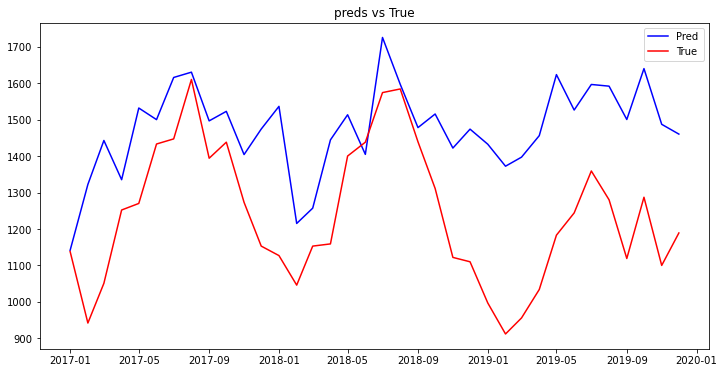

In [399]:
plot('Sarimax35512')

In [381]:
mape(results.ctotal,results.Sarimax35512)

21.140377291434717

In [382]:
mean_squared_error(results.ctotal,results.Sarimax30512)

29968.75995118216

In [383]:
mod=SARIMAX(X_train,exog=y_train,order=(3,1,5),seasonal_order=(3,1,5,24),time_varying_regression=False)
res=mod1.fit()
pred=res.predict(start='01-01-2017',end='01-02-2020',exog=y_test,dynamic=True)

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:

In [384]:
pred.head()

2017-01-01    1285.138107
2017-02-01    1259.193204
2017-03-01    1260.930570
2017-04-01    1439.112194
2017-05-01    1532.452876
Freq: MS, Name: predicted_mean, dtype: float64

In [385]:
results=results.join(pred)
results.rename(columns={"predicted_mean":'Sarimax31524'},inplace=True)

In [386]:
results.head()

,ctotal,Sarimax30512,Sarimax35512,Sarimax31524
date,,,,
2017-01-01,1138,1285.138107,1141.489689,1285.138107
2017-02-01,942,1259.193204,1322.117869,1259.193204
2017-03-01,1051,1260.930570,1442.708431,1260.930570
2017-04-01,1252,1439.112194,1335.111520,1439.112194
2017-05-01,1270,1532.452876,1531.689175,1532.452876


<ipython-input-396-11b70f4b2fbd>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


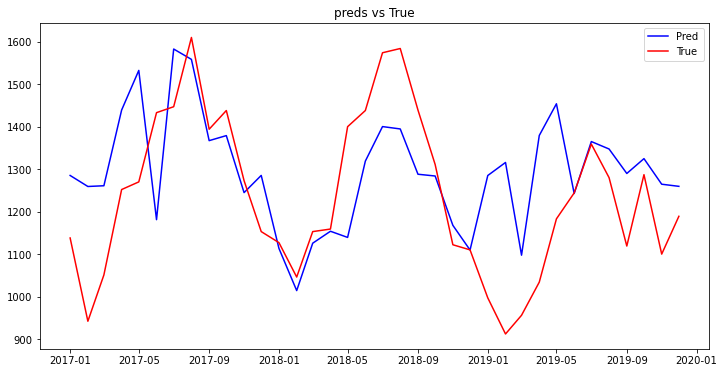

In [400]:
plot('Sarimax31524')

In [389]:
mape(results.ctotal,results.Sarimax31524)

11.523959609224883

In [391]:
mean_squared_error(results.ctotal,results.Sarimax31524)

29968.75995118216

In [420]:
Sarimax(X_train,y_train,y_test,(3,1,5),(3,1,5,12))

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:

In [418]:
results=results.join(pred)
results.rename(columns={"predicted_mean":'Sarimax31512'},inplace=True)

In [419]:
results.head()

,ctotal,Sarimax30512,Sarimax35512,Sarimax31524,Sarimax01012,ar214Sarimax31512,ar214Sarimax31524,Sarimax31512
date,,,,,,,,
2017-01-01,1138,1285.138107,1141.489689,1285.138107,1285.138107,1285.138107,1285.138107,1285.138107
2017-02-01,942,1259.193204,1322.117869,1259.193204,1259.193204,1259.193204,1259.193204,1259.193204
2017-03-01,1051,1260.930570,1442.708431,1260.930570,1260.930570,1260.930570,1260.930570,1260.930570
2017-04-01,1252,1439.112194,1335.111520,1439.112194,1439.112194,1439.112194,1439.112194,1439.112194
2017-05-01,1270,1532.452876,1531.689175,1532.452876,1532.452876,1532.452876,1532.452876,1532.452876


In [421]:
mean_squared_error(results.ctotal,results.Sarimax31512)

29968.75995118216

In [422]:
mape(results.ctotal,results.Sarimax31512)

11.523959609224883

<ipython-input-396-11b70f4b2fbd>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


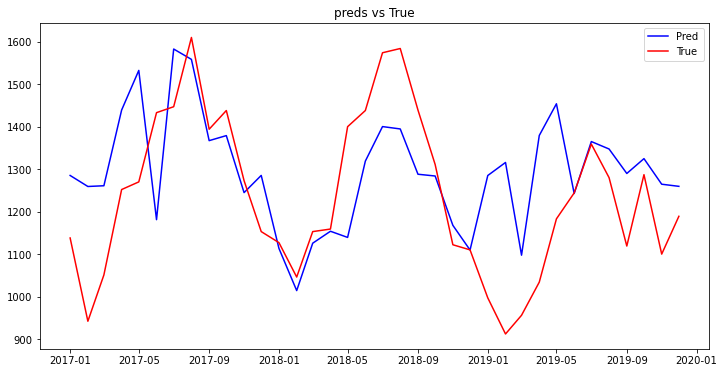

In [403]:
plot('Sarimax31524')

In [364]:
Sarimax(X_train,y_train,y_test,(3,1,5),(3,1,5,24))

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mamer Jammer\anaconda3\lib\site-pack

In [365]:
results=results.join(pred)
results.rename(columns={"predicted_mean":'Sarimax31524'},inplace=True)

In [366]:
results.head()

,ctotal,Sarimax30512,Sarimax35512,Sarimax35524,Sarimax30524,Sarimax31524
date,,,,,,
2017-01-01,1138,1141.489689,1285.138107,1141.489689,1141.489689,1141.489689
2017-02-01,942,1322.117869,1259.193204,1322.117869,1322.117869,1322.117869
2017-03-01,1051,1442.708431,1260.930570,1442.708431,1442.708431,1442.708431
2017-04-01,1252,1335.111520,1439.112194,1335.111520,1335.111520,1335.111520
2017-05-01,1270,1531.689175,1532.452876,1531.689175,1531.689175,1531.689175


<ipython-input-396-11b70f4b2fbd>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


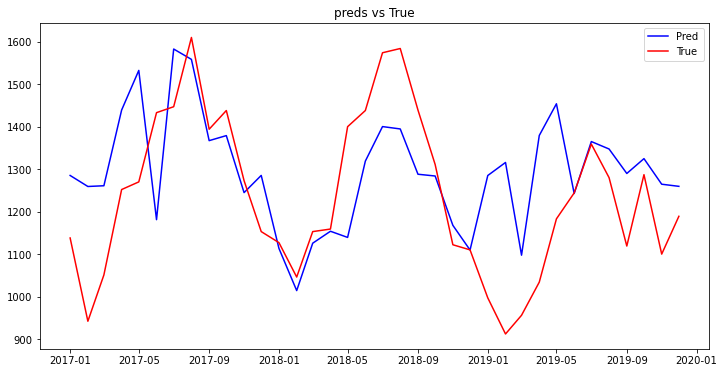

In [406]:
plot('Sarimax31524')

In [407]:
mape(results.ctotal,results.Sarimax31524)

11.523959609224883

In [393]:
Sarimax(X_train,y_train,y_test,(3,1,5),(0,1,0,12))

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [394]:
results=results.join(pred)
results.rename(columns={"predicted_mean":'Sarimax01012'},inplace=True)

<ipython-input-396-11b70f4b2fbd>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


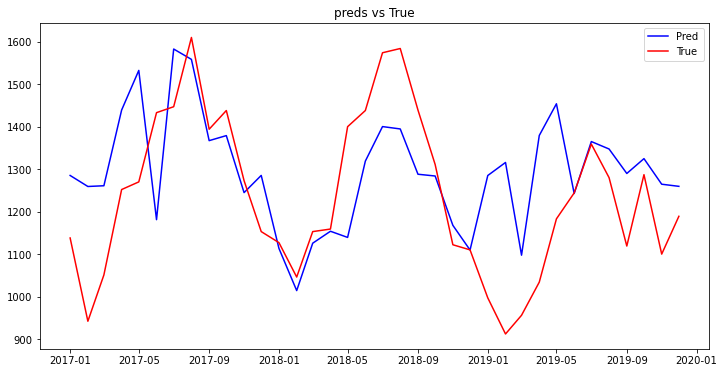

In [408]:
plot('Sarimax01012')

In [409]:
mape(results.ctotal,results.Sarimax01012)

11.523959609224883

In [410]:
Sarimax(X_train,y_train,y_test,(2,1,4),(3,1,5,12))

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:

In [411]:
results=results.join(pred)
results.rename(columns={"predicted_mean":'ar214Sarimax31512'},inplace=True)

<ipython-input-396-11b70f4b2fbd>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


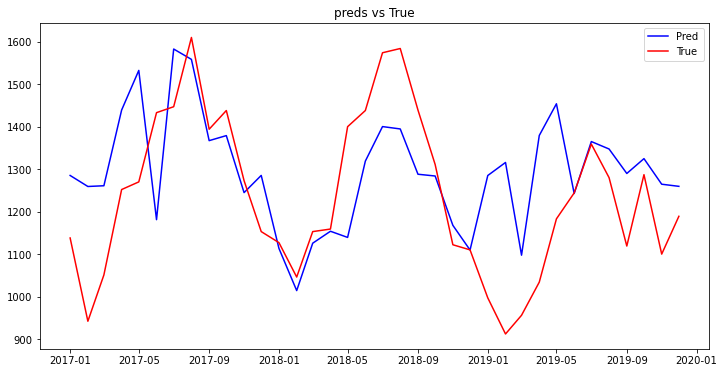

In [412]:
plot('ar214Sarimax31512')

In [413]:
mape(results.ctotal,results.ar214Sarimax31512)

11.523959609224883

<AxesSubplot:xlabel='date'>

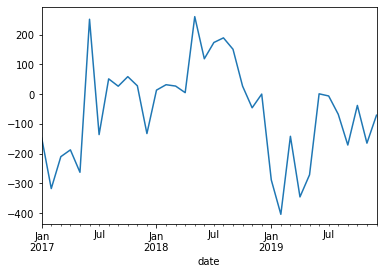

In [424]:
residual=results.ctotal-results.ar214Sarimax31512
residual.plot()

In [414]:
Sarimax(X_train,y_train,y_test,(2,1,4),(3,1,5,24))

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [415]:
results=results.join(pred)
results.rename(columns={"predicted_mean":'ar214Sarimax31524'},inplace=True)

<ipython-input-396-11b70f4b2fbd>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


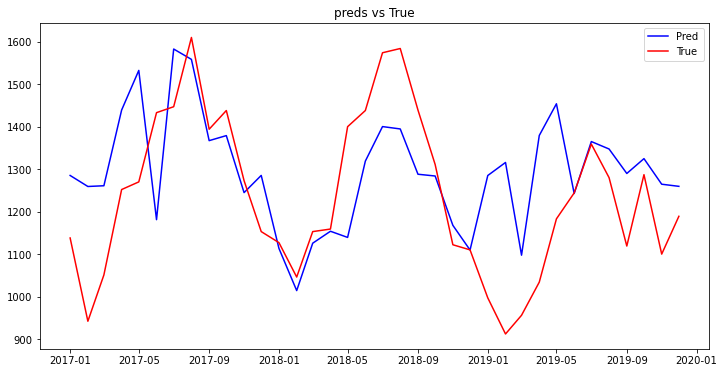

In [416]:
plot('ar214Sarimax31524')

In [417]:
mape(results.ctotal,results.ar214Sarimax31524)

11.523959609224883

In [425]:
Sarimax(X_train,y_train,y_test,(2,1,4),(3,1,5,5))

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:

In [426]:
results=results.join(pred)
results.rename(columns={"predicted_mean":'ar214Sarimax3155'},inplace=True)

<ipython-input-396-11b70f4b2fbd>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


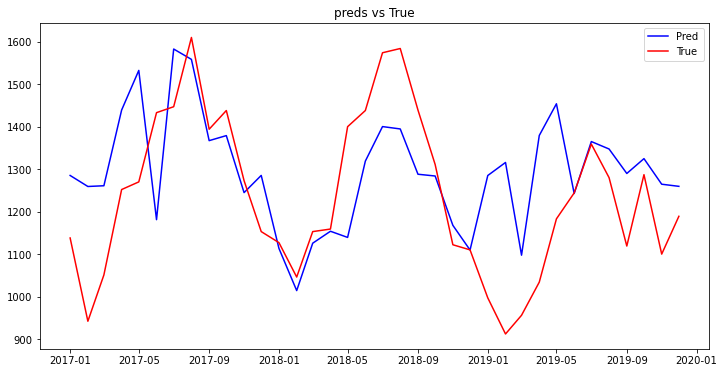

In [427]:
plot('ar214Sarimax3155')

In [428]:
mape(results.ctotal,results.ar214Sarimax3155)

11.523959609224883

<ipython-input-396-11b70f4b2fbd>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


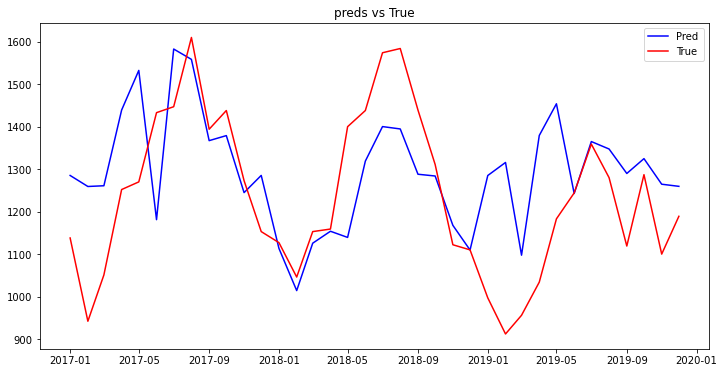

In [429]:
plot('ar214Sarimax3155')